# 4.3 - Dask

![dask](images/dask.png)


$$$$

[Dask](https://dask.org/) es un proyecto de código abierto que permite a los desarrolladores crear su software en coordinación con scikit-learn , pandas y NumPy. Es una herramienta muy versátil que funciona con una amplia gama de cargas de trabajo.

Esta herramienta incluye dos partes importantes; programación dinámica de tareas y recopilación de big data. La parte anterior es muy similar a Luigi , Celery y Airflow , con la excepción de que está optimizada específicamente para cargas de trabajo computacionales interactivas.

La última parte incluye marcos de datos, matrices paralelas y listas extendidas a interfaces populares como pandas y NumPy. De hecho, el Sr. Matthew Rocklin, creador de Dask, confirma que Dask se creó originalmente para paralelizar pandas y NumPy, aunque ahora ofrece muchos más beneficios que un sistema paralelo genérico. Los marcos de datos de Dask son ideales para escalar los flujos de trabajo de pandas y habilitar aplicaciones para series de tiempo. Además, la matriz Dask ofrece análisis de datos multidimensionales para aplicaciones biomédicas, así como algoritmos de aprendizaje automático.

La característica mágica es que esta herramienta requiere cambios mínimos de código y además se ejecuta en clústeres de forma resistente. Además, puede ejecutar este código en paralelo mientras procesa datos, lo que simplemente se traduce en menos tiempo de ejecución, menos tiempo de espera.

El dataframe de Dask comprende marcos de datos de pandas más pequeños, por lo que permite subconjuntos de sintaxis de consulta de pandas. Además es totalmente capaz de programar, construir e incluso optimizar cálculos computacionales complejos en gráficos. Esta es la razón por la que las empresas que operan en cientos de terabytes pueden optar por esta herramienta como opción de acceso.

Dask también le permite crear canalizaciones para matrices de datos, que luego se pueden transferir a los recursos informáticos relevantes. Con todo, esta herramienta es mucho más que una versión paralela de pandas.

$$$$

![dask_process](images/dask_process.png)

$$$$

In [ ]:
!pip install "dask[complete]"
!pip install dask_ml

**Cargando varios archivos**

In [2]:
import os
import dask
import dask.dataframe as dd

In [3]:
archivos=os.path.join('../data', 'accounts.*.csv')
print(archivos)

../data/accounts.*.csv


In [4]:
df=dd.read_csv(archivos)
df.head()

,id,names,amount
0,23,Ursula,1380
1,92,Tim,-178
2,239,Alice,-784
3,260,Michael,-249
4,314,Jerry,1299


### Ejemplo aeropuertos

In [5]:
os.path.join('../data', 'nycflights', '*.csv')

'../data/nycflights/*.csv'

In [6]:
df=dd.read_csv(os.path.join('../data', 'nycflights', '*.csv'),
               parse_dates={'Date':[0,1,2]})
df.head()

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1990-01-01,1,1621.0,1540,1747.0,1701,US,33,NaN,86.0,...,NaN,46.0,41.0,EWR,PIT,319.0,NaN,NaN,0,0
1,1990-01-02,2,1547.0,1540,1700.0,1701,US,33,NaN,73.0,...,NaN,-1.0,7.0,EWR,PIT,319.0,NaN,NaN,0,0
2,1990-01-03,3,1546.0,1540,1710.0,1701,US,33,NaN,84.0,...,NaN,9.0,6.0,EWR,PIT,319.0,NaN,NaN,0,0
3,1990-01-04,4,1542.0,1540,1710.0,1701,US,33,NaN,88.0,...,NaN,9.0,2.0,EWR,PIT,319.0,NaN,NaN,0,0
4,1990-01-05,5,1549.0,1540,1706.0,1701,US,33,NaN,77.0,...,NaN,5.0,9.0,EWR,PIT,319.0,NaN,NaN,0,0


In [7]:
df.tail()

ValueError: Mismatched dtypes found in `pd.read_csv`/`pd.read_table`.

+----------------+---------+----------+
| Column         | Found   | Expected |
+----------------+---------+----------+
| CRSElapsedTime | float64 | int64    |
| TailNum        | object  | float64  |
+----------------+---------+----------+

The following columns also raised exceptions on conversion:

- TailNum
  ValueError("could not convert string to float: 'N54711'")

Usually this is due to dask's dtype inference failing, and
*may* be fixed by specifying dtypes manually by adding:

dtype={'CRSElapsedTime': 'float64',
       'TailNum': 'object'}

to the call to `read_csv`/`read_table`.

In [8]:
df=dd.read_csv(os.path.join('../data', 'nycflights', '*.csv'),
               parse_dates={'Date':[0,1,2]},
               
               dtype={'TailNum': str, 'CRSElapsedTime':float, 'Cancelled':bool})


df.tail()

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
269176,1999-12-27,1,1645.0,1645,1830.0,1901,UA,1753,N516UA,225.0,...,205.0,-31.0,0.0,LGA,DEN,1619.0,7.0,13.0,False,0
269177,1999-12-28,2,1726.0,1645,1928.0,1901,UA,1753,N504UA,242.0,...,214.0,27.0,41.0,LGA,DEN,1619.0,5.0,23.0,False,0
269178,1999-12-29,3,1646.0,1645,1846.0,1901,UA,1753,N592UA,240.0,...,220.0,-15.0,1.0,LGA,DEN,1619.0,5.0,15.0,False,0
269179,1999-12-30,4,1651.0,1645,1908.0,1901,UA,1753,N575UA,257.0,...,233.0,7.0,6.0,LGA,DEN,1619.0,5.0,19.0,False,0
269180,1999-12-31,5,1642.0,1645,1851.0,1901,UA,1753,N539UA,249.0,...,232.0,-10.0,-3.0,LGA,DEN,1619.0,6.0,11.0,False,0


In [9]:
df.info(memory_usage='deep')

<class 'dask.dataframe.core.DataFrame'>
Columns: 21 entries, Date to Diverted
dtypes: datetime64[ns](1), object(4), bool(1), float64(10), int64(5)
memory usage: 401.0 MB


In [10]:
df.shape

(Delayed('int-3fe39cb6-7f4f-4857-a841-b2b48fadaeb3'), 21)

In [11]:
len(df)

2611892

In [12]:
df.head()

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1990-01-01,1,1621.0,1540,1747.0,1701,US,33,NaN,86.0,...,NaN,46.0,41.0,EWR,PIT,319.0,NaN,NaN,False,0
1,1990-01-02,2,1547.0,1540,1700.0,1701,US,33,NaN,73.0,...,NaN,-1.0,7.0,EWR,PIT,319.0,NaN,NaN,False,0
2,1990-01-03,3,1546.0,1540,1710.0,1701,US,33,NaN,84.0,...,NaN,9.0,6.0,EWR,PIT,319.0,NaN,NaN,False,0
3,1990-01-04,4,1542.0,1540,1710.0,1701,US,33,NaN,88.0,...,NaN,9.0,2.0,EWR,PIT,319.0,NaN,NaN,False,0
4,1990-01-05,5,1549.0,1540,1706.0,1701,US,33,NaN,77.0,...,NaN,5.0,9.0,EWR,PIT,319.0,NaN,NaN,False,0


In [14]:
df.DepDelay.max().compute()

1435.0

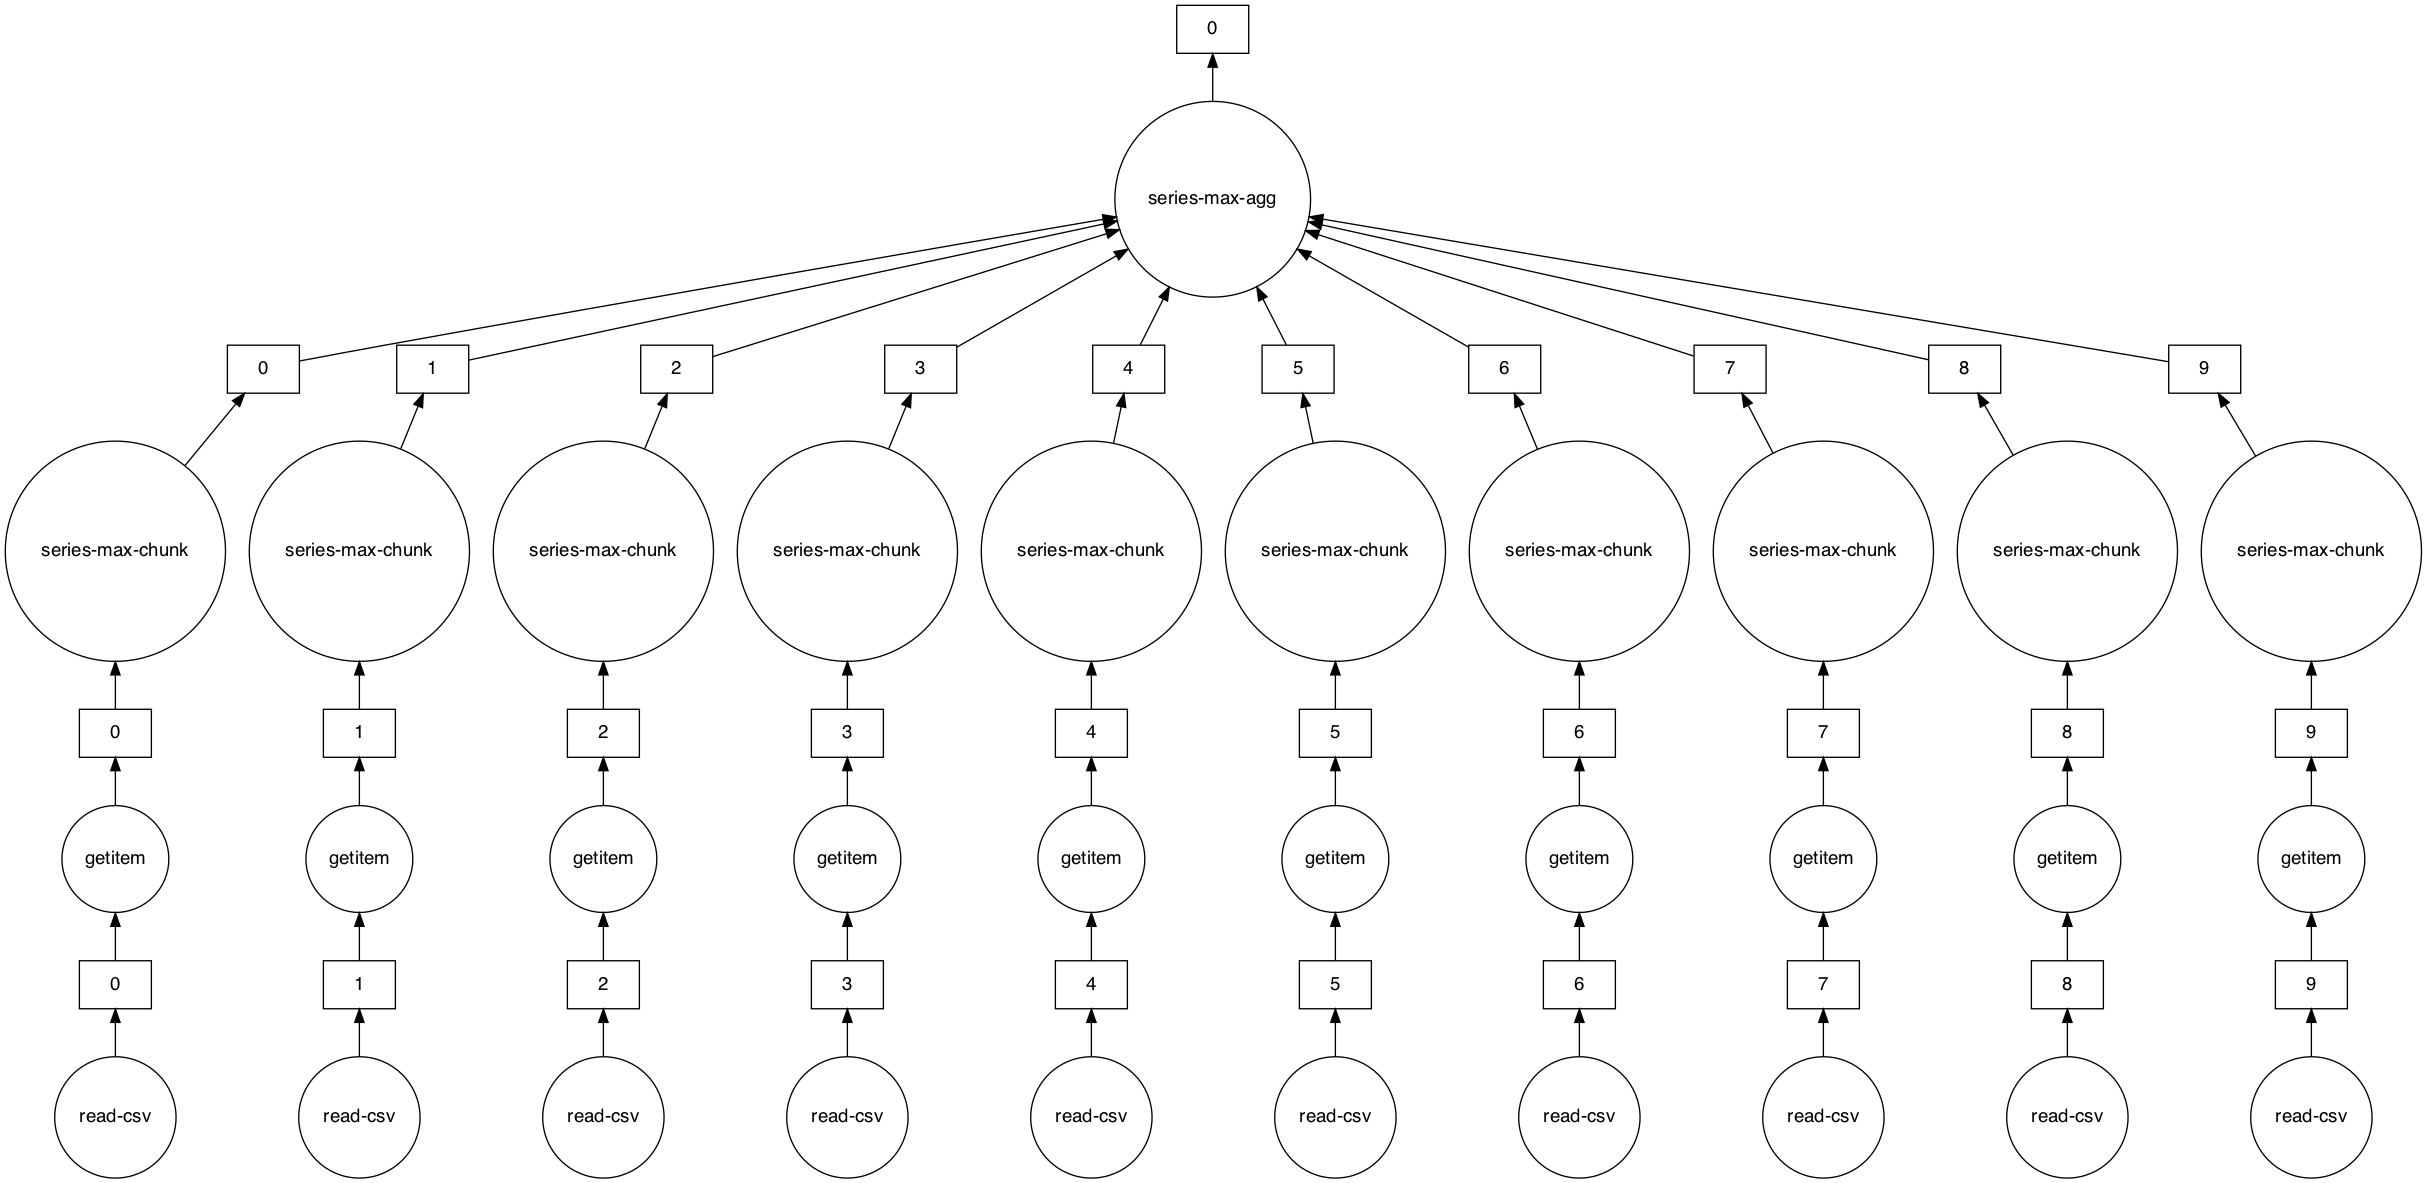

In [15]:
df.DepDelay.max().visualize(filename='images/max_dask.png')

In [16]:
len(df[~df.Cancelled])    # virgulilla ==> lo contrario (como el no logico)

2540961

In [19]:
df.groupby('Origin').DepDelay.mean().compute()

Origin
EWR    10.295469
JFK    10.351299
LGA     7.431142
Name: DepDelay, dtype: float64

In [20]:
no_cancelado=df[~df.Cancelled]

media_delay=no_cancelado.DepDelay.mean()

std_delay=no_cancelado.DepDelay.std()

In [21]:
std_delay

dd.Scalar<series-..., dtype=float64>

In [22]:
%time media_delay.compute()

CPU times: user 3.2 s, sys: 649 ms, total: 3.85 s
Wall time: 1.79 s


9.206602541321965

In [23]:
%time std_delay.compute()

CPU times: user 3.18 s, sys: 633 ms, total: 3.81 s
Wall time: 1.79 s


28.974539774551456

In [24]:
%time media_delay_res, std_delay_res = dask.compute(media_delay, std_delay)

CPU times: user 3.2 s, sys: 650 ms, total: 3.85 s
Wall time: 1.82 s


In [25]:
media_delay_res

9.206602541321965

In [26]:
std_delay_res

28.974539774551456

In [27]:
type(std_delay_res)

numpy.float64

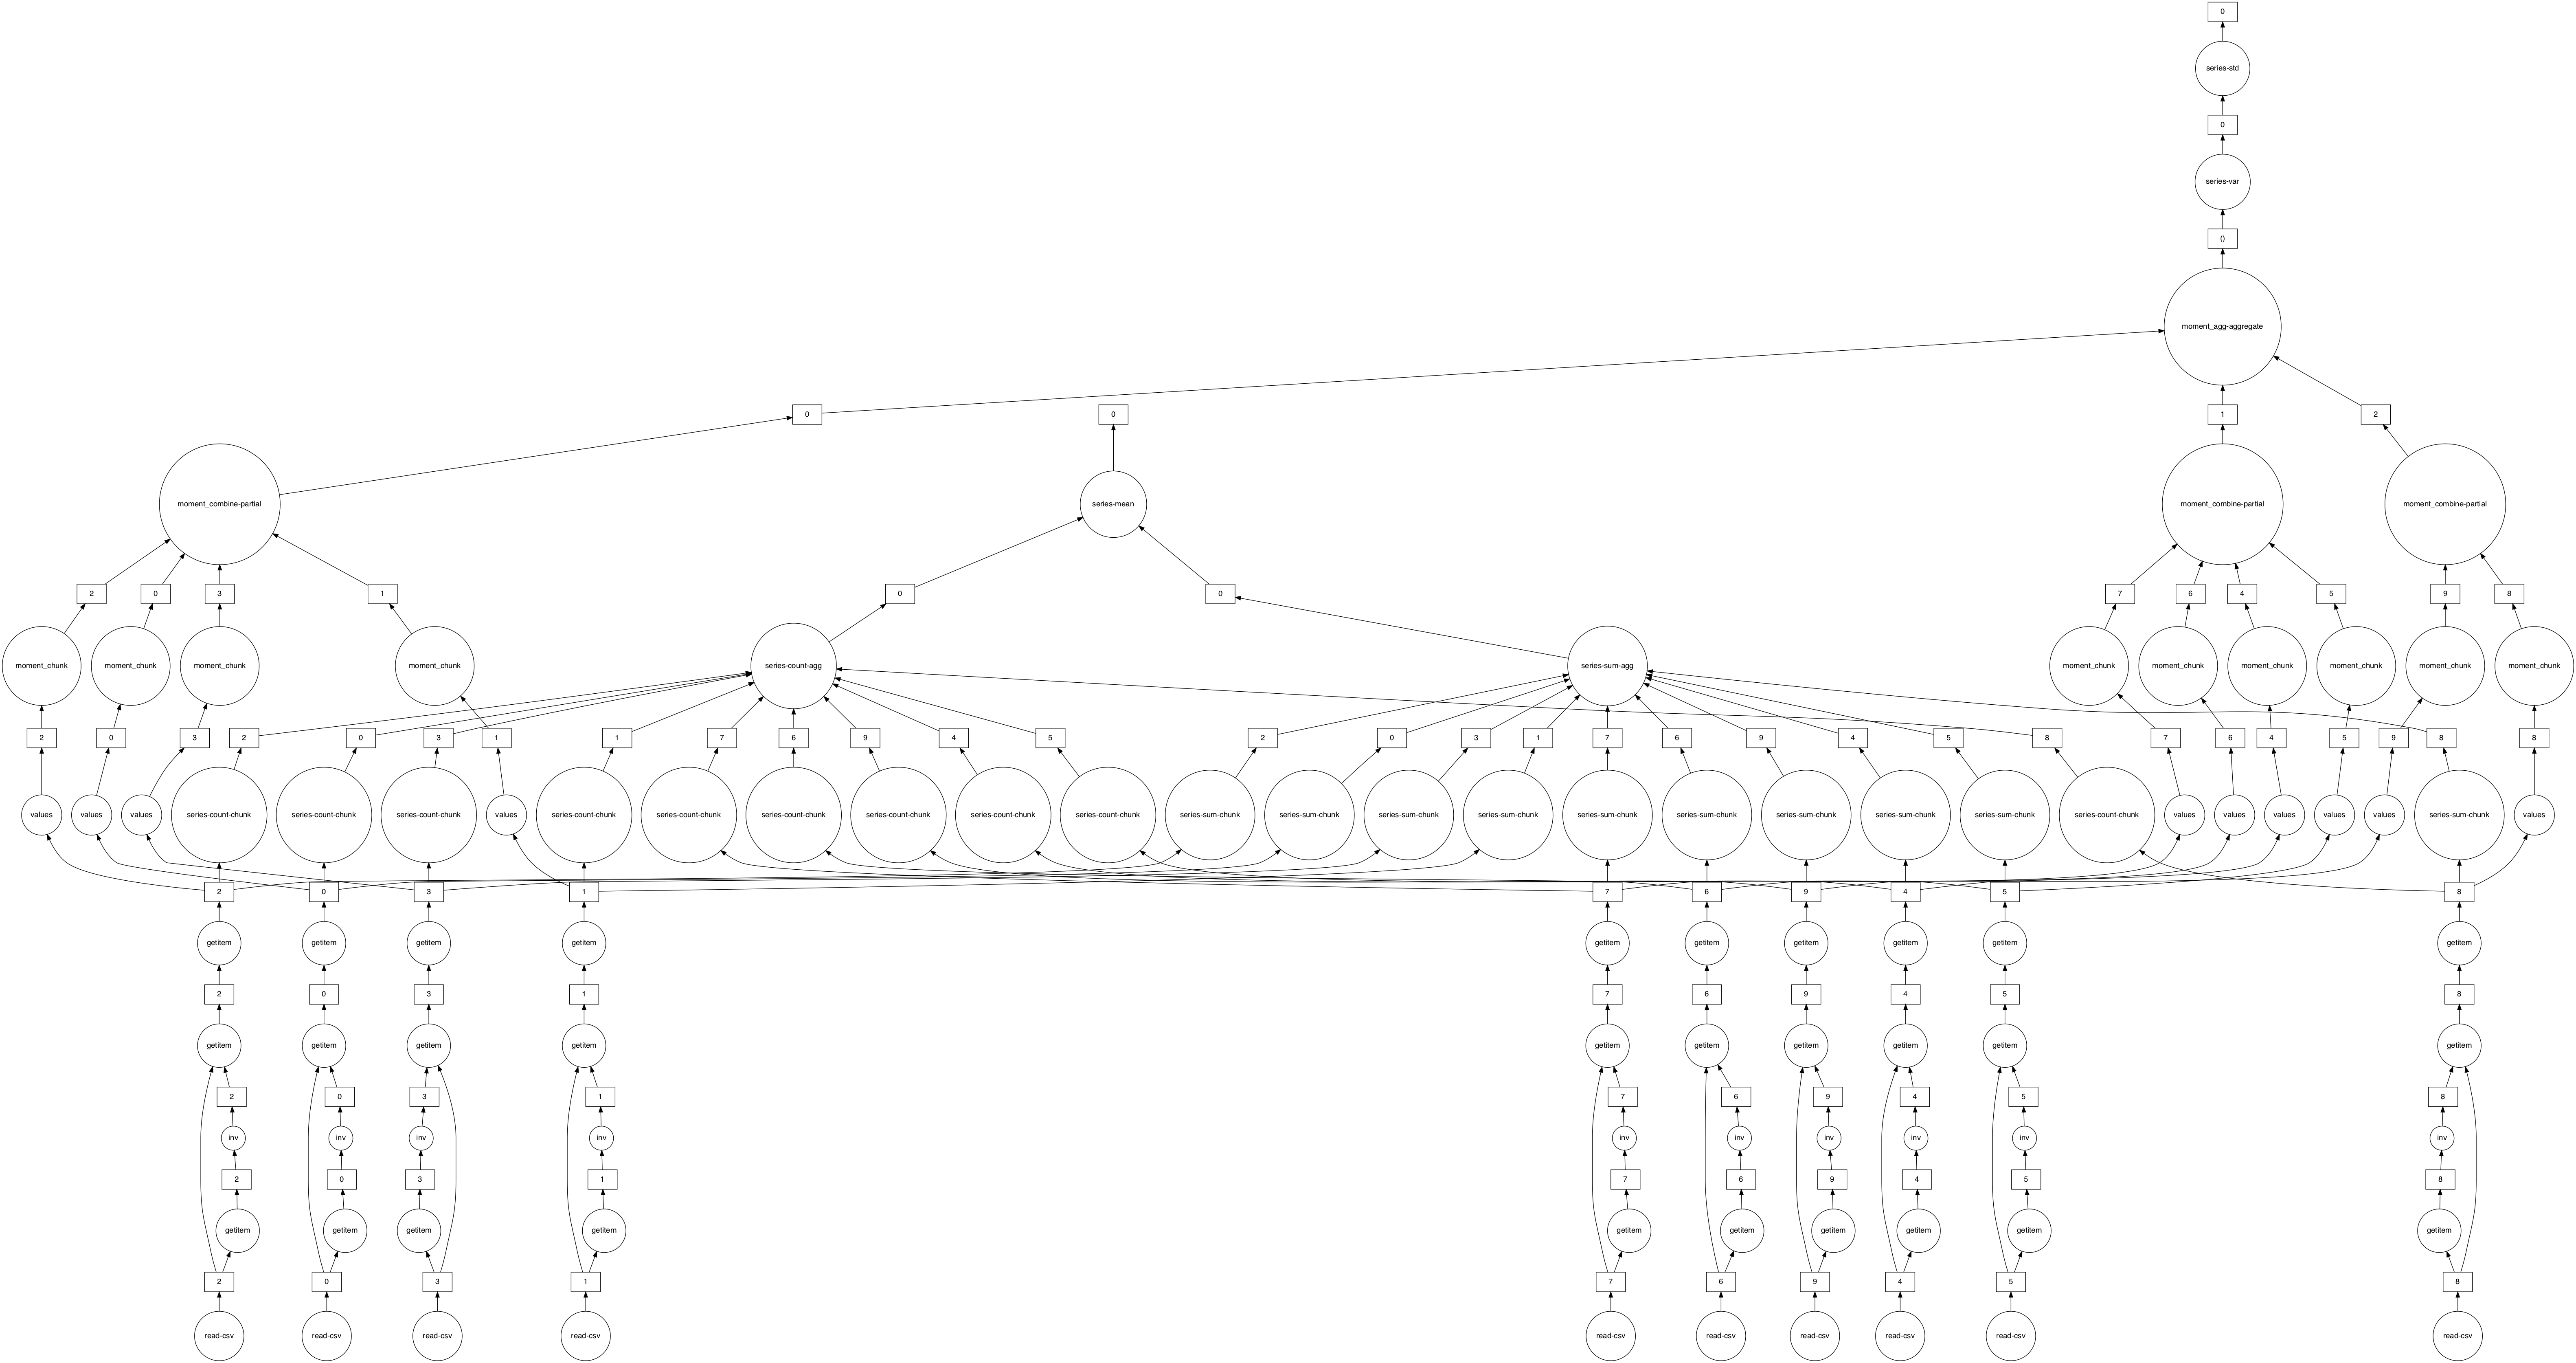

In [28]:
dask.visualize(media_delay, std_delay, filename='images/std_dask.png')

### Tip

El tipo de archivo cambia la forma de procesar y su velocidad. Usaremos archivos `.csv`, `.parquet` y `h5` o `hdfs`

In [29]:
%time df_csv=dd.read_csv(archivos)
df_csv.head()

CPU times: user 9.46 ms, sys: 12.3 ms, total: 21.7 ms
Wall time: 17.8 ms


,id,names,amount
0,23,Ursula,1380
1,92,Tim,-178
2,239,Alice,-784
3,260,Michael,-249
4,314,Jerry,1299


In [30]:
target=os.path.join('../data', 'accounts.h5')

In [31]:
%time df_csv.to_hdf(target, key='../data')

CPU times: user 1.69 s, sys: 187 ms, total: 1.87 s
Wall time: 1.99 s


['../data/accounts.h5', '../data/accounts.h5', '../data/accounts.h5']

In [32]:
%time df_h=dd.read_hdf(target, key='../data')
df_h.head()

CPU times: user 22 ms, sys: 5.17 ms, total: 27.2 ms
Wall time: 26.2 ms


,id,names,amount
0,23,Ursula,1380
1,92,Tim,-178
2,239,Alice,-784
3,260,Michael,-249
4,314,Jerry,1299


In [33]:
df_h.info(memory_usage='deep')

<class 'dask.dataframe.core.DataFrame'>
Columns: 3 entries, id to amount
dtypes: object(1), int64(2)
memory usage: 91.6 MB


In [34]:
%time df_h.amount.sum().compute()

CPU times: user 836 ms, sys: 75 ms, total: 911 ms
Wall time: 908 ms


3101435607

In [35]:
# parquet
%pip install fastparquet

Note: you may need to restart the kernel to use updated packages.


In [36]:
target=os.path.join('../data', 'accounts.parquet')

df_csv.categorize(columns=['names']).to_parquet(target,
                                                storage_options={'has_nulls':True},
                                                engine='fastparquet')

(None,)

In [ ]:
%%time 
df_p=dd.read_parquet(target)
df_p.head()

In [38]:
df_csv.info(memory_usage='deep')

<class 'dask.dataframe.core.DataFrame'>
Columns: 3 entries, id to amount
dtypes: object(1), int64(2)
memory usage: 68.7 MB


In [40]:
df_p.info(memory_usage='deep')

In [41]:
%time df_csv.amount.sum().compute()

CPU times: user 305 ms, sys: 63.7 ms, total: 369 ms
Wall time: 146 ms


3101435607

In [ ]:
%time df_p.amount.sum().compute()

In [42]:
%time df_h.amount.sum().compute()

CPU times: user 834 ms, sys: 85.2 ms, total: 919 ms
Wall time: 916 ms


3101435607